<a href="https://colab.research.google.com/github/Ayushvish0512/mb/blob/main/youtube_video_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello I Welcome You**

In [ ]:
from googleapiclient.discovery import build
import pandas as pd

# Define your API key
API_KEY = "Your API Key" # enter Your API key here

# Function to retrieve comments from a video
def get_all_video_comments(video_id):
    youtube = build('youtube', 'v3', developerKey=API_KEY)
    comments = []
    nextPageToken = None

    while True:
        response = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,  # Adjust as needed, maximum allowed is 100 PER PAGE
            pageToken=nextPageToken
        ).execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            public = item['snippet']['isPublic']
            comments.append([
                comment['authorDisplayName'],
                comment['publishedAt'],
                comment['likeCount'],
                comment['textOriginal'],
                public
            ])

        nextPageToken = response.get('nextPageToken') # goes to check for pages
        if not nextPageToken:
            break

    return comments

# Example video ID (you can replace it with your own)
video_id = "uJMCNJP2ipI" # Deadpool & Wolverine | Official Teaser

# Get comments for the video
comments = get_all_video_comments(video_id)

# Create DataFrame from comments
df = pd.DataFrame(comments, columns=['author', 'updated_at', 'like_count', 'text','public'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26481 entries, 0 to 26480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   author      26481 non-null  object
 1   updated_at  26481 non-null  object
 2   like_count  26481 non-null  int64 
 3   text        26481 non-null  object
 4   public      26481 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 853.5+ KB


In [ ]:
 df["updated_at"]=pd.to_datetime(df["updated_at"])

In [ ]:
df["Date"] = df["updated_at"].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
df

,author,updated_at,like_count,text,public,Date
0,@stactionsmedia3318,2024-02-24 22:52:48+00:00,0,😂 I wasn't unconscious,True,2024-02-24 22:52
1,@ZennexYT,2024-02-24 22:36:06+00:00,0,1:37 \n\n20th Century fox,True,2024-02-24 22:36
2,@RobsWorld,2024-02-24 21:54:01+00:00,1,"Ooh..pegging, the TVA, Deadpool and Wolverine—...",True,2024-02-24 21:54
3,@srd4952,2024-02-24 21:40:38+00:00,0,What does marvel means in MCU,True,2024-02-24 21:40
4,@user-ol3xk5fc7h,2024-02-24 21:36:33+00:00,0,"“Pegging isn’t new friendo, but it is for Disn...",True,2024-02-24 21:36
...,...,...,...,...,...,...
26476,@Therealdoctor_mdj,2024-02-11 23:37:11+00:00,0,First comment,True,2024-02-11 23:37
26477,@lionelibarra8236,2024-02-11 23:37:11+00:00,0,First,True,2024-02-11 23:37
26478,@L3ONSK11,2024-02-11 23:37:11+00:00,0,Yooo 😊,True,2024-02-11 23:37
26479,@MrBmr111,2024-02-11 23:37:06+00:00,0,Omg,True,2024-02-11 23:37


In [ ]:
df.drop("updated_at",axis=1,inplace=True)

In [ ]:
df.public.value_counts()

True    26481
Name: public, dtype: int64

In [ ]:
df.drop("public",axis=1,inplace=True)

In [ ]:
df

,author,like_count,text,Date
0,@stactionsmedia3318,0,😂 I wasn't unconscious,2024-02-24 22:52
1,@ZennexYT,0,1:37 \n\n20th Century fox,2024-02-24 22:36
2,@RobsWorld,1,"Ooh..pegging, the TVA, Deadpool and Wolverine—...",2024-02-24 21:54
3,@srd4952,0,What does marvel means in MCU,2024-02-24 21:40
4,@user-ol3xk5fc7h,0,"“Pegging isn’t new friendo, but it is for Disn...",2024-02-24 21:36
...,...,...,...,...
26476,@Therealdoctor_mdj,0,First comment,2024-02-11 23:37
26477,@lionelibarra8236,0,First,2024-02-11 23:37
26478,@L3ONSK11,0,Yooo 😊,2024-02-11 23:37
26479,@MrBmr111,0,Omg,2024-02-11 23:37


In [ ]:
df["Date"]=pd.to_datetime(df["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26481 entries, 0 to 26480
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   author      26481 non-null  object        
 1   like_count  26481 non-null  int64         
 2   text        26481 non-null  object        
 3   Date        26481 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 827.7+ KB


In [ ]:
# Importing necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.stem import WordNetLemmatizer

# Downloading NLTK resources
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove phone numbers
    text = re.sub(r'\d{10,}', '', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
# Remove tags, emojis, symbols & Special character
def remove_special_chars(text):
    # Remove tags
    text = re.sub(r'<.*?>', '', text)
    # Remove emojis, symbols, and Special character
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

df['clean_text'] = df['clean_text'].apply(remove_special_chars)

In [ ]:
# Convert to lowercase and lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]
    return ' '.join(lemmatized_words)

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

In [ ]:
# Duplicates removal
df.drop_duplicates(subset=['clean_text'], inplace=True)

In [ ]:
df.drop('text',axis=1,inplace=True)

In [ ]:
df

,author,like_count,Date,clean_text
0,@stactionsmedia3318,0,2024-02-24 22:52:00,i wasnt unconscious
1,@ZennexYT,0,2024-02-24 22:36:00,137 20th century fox
2,@RobsWorld,1,2024-02-24 21:54:00,oohpegging the tva deadpool and wolverineoh my...
3,@srd4952,0,2024-02-24 21:40:00,what doe marvel mean in mcu
4,@user-ol3xk5fc7h,0,2024-02-24 21:36:00,pegging isnt new friendo but it is for disney ...
...,...,...,...,...
26462,@Jep_Hogglebirg,0,2024-02-11 23:37:00,not 1st
26464,@gabrielmolina5599,1,2024-02-11 23:37:00,yeah he here
26466,@Ge3291,10,2024-02-11 23:37:00,finally ive been waiting
26467,@christianleon4234,0,2024-02-11 23:37:00,yer


In [ ]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

# Applying sentiment analyzer to each comment
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)

# Labeling Sentiments with graded levels
def label_sentiment(score):
    if score >= 0.5:
        return 'Very positive'
    elif 0.1 <= score < 0.5:
        return 'Positive'
    elif -0.1 <= score < 0.1:
        return 'Neutral'
    elif -0.5 <= score < -0.1:
        return 'Negative'
    else:
        return 'Very negative'

# Apply sentiment labeling with graded levels
df['graded_sentiment_label'] = df['sentiment_score'].apply(label_sentiment)
df

,author,like_count,Date,clean_text,sentiment_score,graded_sentiment_label
0,@stactionsmedia3318,0,2024-02-24 22:52:00,i wasnt unconscious,0.0000,Neutral
1,@ZennexYT,0,2024-02-24 22:36:00,137 20th century fox,0.0000,Neutral
2,@RobsWorld,1,2024-02-24 21:54:00,oohpegging the tva deadpool and wolverineoh my...,0.6369,Very positive
3,@srd4952,0,2024-02-24 21:40:00,what doe marvel mean in mcu,0.4215,Positive
4,@user-ol3xk5fc7h,0,2024-02-24 21:36:00,pegging isnt new friendo but it is for disney ...,0.0000,Neutral
...,...,...,...,...,...,...
26462,@Jep_Hogglebirg,0,2024-02-11 23:37:00,not 1st,0.0000,Neutral
26464,@gabrielmolina5599,1,2024-02-11 23:37:00,yeah he here,0.2960,Positive
26466,@Ge3291,10,2024-02-11 23:37:00,finally ive been waiting,0.0000,Neutral
26467,@christianleon4234,0,2024-02-11 23:37:00,yer,0.0000,Neutral


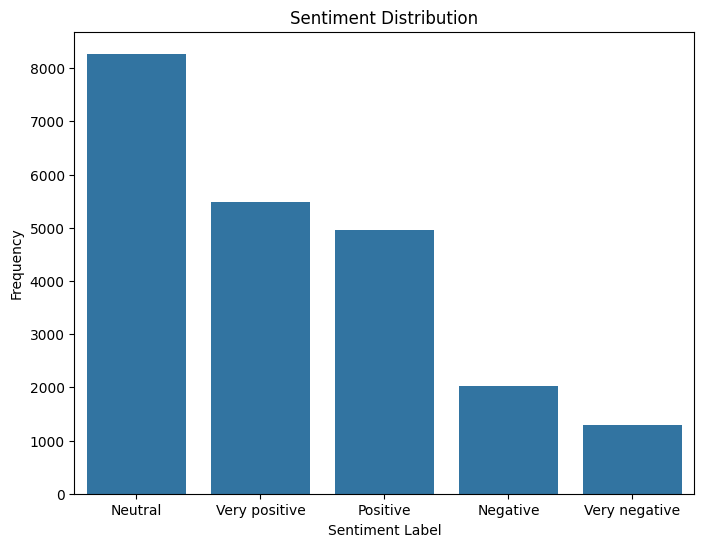

In [ ]:
# 1. Sentiment Distribution Analysis
sentiment_distribution = df['graded_sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')
plt.show()

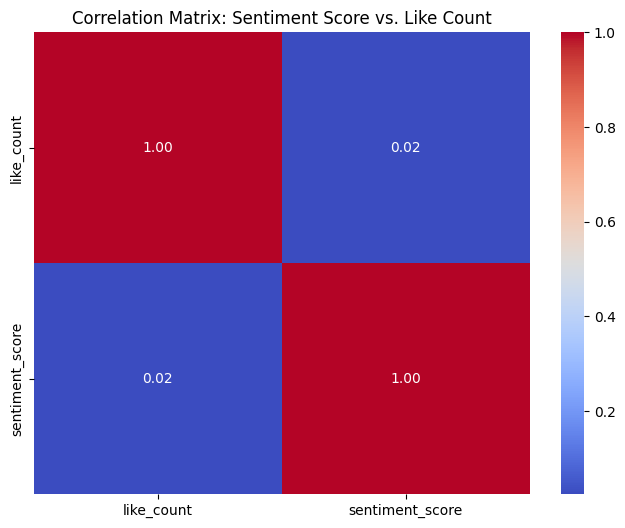

Correlation Matrix:
                 like_count  sentiment_score
like_count         1.000000         0.024853
sentiment_score    0.024853         1.000000


In [ ]:
# 2. Sentiment Correlation Analysis
correlation_matrix = df[['like_count', 'sentiment_score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Sentiment Score vs. Like Count')
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)

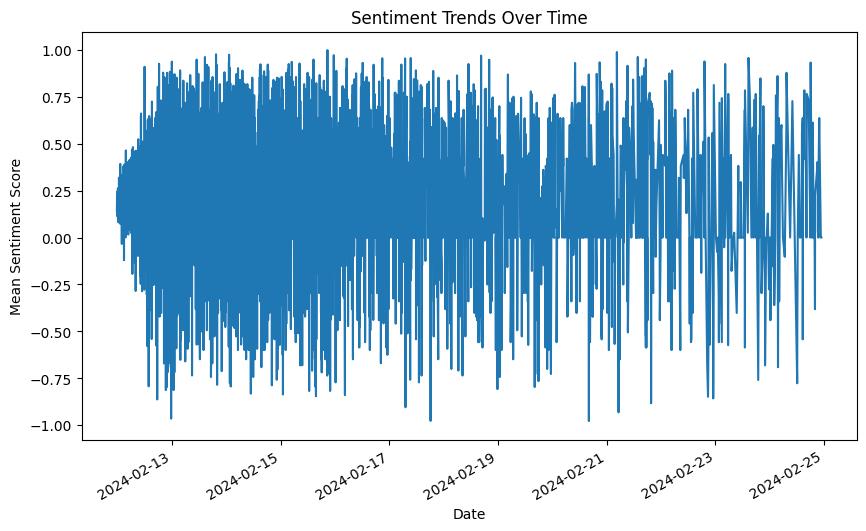

In [ ]:
# 3. Explore Sentiment Trends Over Time (assuming 'updated_at' is a datetime column)
sentiment_trends = df.groupby('Date')['sentiment_score'].mean()
plt.figure(figsize=(10, 6))
sentiment_trends.plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.show()

In [ ]:
df.graded_sentiment_label.value_counts()

Neutral          8272
Very positive    5490
Positive         4950
Negative         2030
Very negative    1284
Name: graded_sentiment_label, dtype: int64

In [ ]:
# 4. Identify Top Positive/Negative Comments
top_positive_comments = df[df['graded_sentiment_label'] == 'Very positive'].nlargest(10, 'sentiment_score')[['like_count', 'clean_text']]
top_negative_comments = df[df['graded_sentiment_label'] == 'Very negative'].nsmallest(5, 'sentiment_score')[['like_count', 'clean_text']]

print("Top 5 Positive Comments:")
print(top_positive_comments)
print("\nTop 5 Negative Comments:")
print(top_negative_comments)

Top 5 Positive Comments:
       like_count                                         clean_text
1745            0  dear marvel game i am a fan of your game and i...
24878           0  yes yes yes yes yes yes yes yes yes yes yes ye...
11909           0  please be good please be good please be good p...
286             1  i actually really like that they didnt show an...
13190           0  it going to be so good it going to be so good ...
7548            0  ryan thank you so much for working so hard to ...
1113            0  trailer is good but making fun of there own st...
16835           0  marvel please dont ruin this marvel please don...
393             1  i am a fan of matthew macfadyen but i wonder w...
5883            1  i am eagerly waiting for deadpool 3 movie i am...

Top 5 Negative Comments:
       like_count                                         clean_text
17776           0  closest to daredevil film antman and the wasp ...
6216            0  according to an american insider 

In [ ]:
# Identify Positive/Negative Comments
print("Top 10 Positive Comments:")
for index, row in top_positive_comments.iterrows():
    print("Likes: {}".format(row['like_count']))
    print("Comment: {}".format(row['clean_text']))
    print()
print("\nTop 5 Negative Comments:")
for index, row in top_negative_comments.iterrows():
    print("Likes: {}".format(row['like_count']))
    print("Comment: {}".format(row['clean_text']))
    print()
print("\n")

Top 10 Positive Comments:
Likes: 0
Comment: dear marvel game i am a fan of your game and i appreciate the quality and variety of your product however i have a suggestion that i think would improve your offering and attract more player i noticed that you do not have a massively multiplayer online game mmo based on the marvel universe this is a missed opportunity a there is a huge demand for such a game among marvel fan and gamers in general a marvel mmo would allow player to create their own superheroes team up with other player and explore a rich and dynamic world filled with marvel character and story i think you should consider developing a marvel mmo especially in light of the success of helldivers 2 a scifi coop shooter that launched on ps5 and pc on february 8 2024 helldivers 2 sold around a million copy in just a few day surpassing initial estimate and becoming sonys biggest steam launch the game popularity and positive reception highlight it appeal among player who enjoy coopera

In [ ]:
# 6 Find Top 5 Most Liked Comments
top_5_most_liked_comments = df.nlargest(10, 'like_count')[['like_count','graded_sentiment_label', 'clean_text']]

# Display Top 5 Most Liked Comments
print("Top 5 Most Liked Comments:")
for index, row in top_5_most_liked_comments.iterrows():
    print("Likes: {}".format(row['like_count']))
    print("sentiment_label: {}".format(row['graded_sentiment_label']))
    print("Comment: {}".format(row['clean_text']))
    print()


Top 5 Most Liked Comments:
Likes: 9614
sentiment_label: Very positive
Comment: brooooo marvel jesus i wasnt unconscious wolverine the tva and all the corny joke we needed this let gooooo

Likes: 8044
sentiment_label: Very positive
Comment: ryan reynolds saved deadpool and now will save the mcu the absolute madman

Likes: 6745
sentiment_label: Very positive
Comment: i love the small detail of deadpool saluting cap on screen he a captain america fanboy in the comic

Likes: 6735
sentiment_label: Neutral
Comment: the disney line

Likes: 5709
sentiment_label: Neutral
Comment: pegging isnt new to me but it is for disney had me cryinnnn

Likes: 5070
sentiment_label: Positive
Comment: your little cinematic universe is about to change forever he isnt wrong

Likes: 4724
sentiment_label: Neutral
Comment: i smell what youre stepping in sensei most deadpool line yet

Likes: 4487
sentiment_label: Very positive
Comment: i am the messiah i am marvel jesus the crazy part is that he not wrong this movie

In [ ]:
top_5_most_liked_comments

,like_count,graded_sentiment_label,clean_text
23681,9614,Very positive,brooooo marvel jesus i wasnt unconscious wolve...
4788,8044,Very positive,ryan reynolds saved deadpool and now will save...
3586,6745,Very positive,i love the small detail of deadpool saluting c...
6656,6735,Neutral,the disney line
10959,5709,Neutral,pegging isnt new to me but it is for disney ha...
17163,5070,Positive,your little cinematic universe is about to cha...
3490,4724,Neutral,i smell what youre stepping in sensei most dea...
9894,4487,Very positive,i am the messiah i am marvel jesus the crazy p...
3078,4450,Neutral,pegging isnt new for me friendo but it is for ...
1774,4369,Very positive,of all the hero i couldnt be happier that dead...


In [ ]:
# 7. Calculate the length of each comment
df['comment_length'] = df['clean_text'].apply(len)

# Find the comment with the longest text
longest_comment_index = df['comment_length'].idxmax()
longest_comment = df.loc[longest_comment_index, 'clean_text']
longest_comment_length = df.loc[longest_comment_index, 'comment_length']

# Display the longest comment
print("Longest Comment ({} characters):\n{}".format(longest_comment_length, longest_comment))

Longest Comment (4533 characters):
according to an american insider he discovered what the marvel movie will be like avenger secret war doctor doom arrives at tva and in a battle the villain kill all tva employee and after that he tell loki that he intends to create a new universe where there is no poverty and crime and for this he will have to sacrifice most of the creature of the multiverse soon after he steal loki power and kill him doctor doom build battleworld in the place where the tva is located destroying several timeline and joining the remaining one into just one and because of this he cause the death of trillion of creature in the multiverse nick fury monica rambeau and the fantastic four are at saber and they detect suspicious activity in space monica rambeau and the fantastic four go to battleworld in a ship they arrive at battleworld in the ship and in a battle doctor doom kill monica rambeau and sends the fantastic four to the light dimension with the use of your interdi

In [ ]:
#summarization

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 700.7 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

# Load the larger English NLP pipeline
nlp = spacy.load('en_core_web_lg')

# Assuming df['text'] contains the comments/text
# Filter comments longer than 80 words
long_comments = df[df['clean_text'].apply(lambda x: len(x.split()) > 80)]['clean_text']

# Function to generate a summary for a given text
def generate_summary(text):
    # Tokenize the text into sentences
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]

    # Calculate importance scores for each sentence (you can use any method here)
    # For simplicity, let's consider the length of each sentence
    sentence_scores = {sent: len(sent.split()) for sent in sentences}

    # Select the top N sentences based on their importance scores
    top_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:3]  # Select top 3 sentences

    # Join the selected sentences to generate the summary
    summary = ' '.join(top_sentences)
    return summary

# Generate summaries for long comments and count words before and after summarization
original_word_counts = []
summary_word_counts = []
summaries = []

for comment in long_comments:
    original_word_count = len(comment.split())  # Count words before summarization
    summary = generate_summary(comment)
    summary_word_count = len(summary.split())  # Count words after summarization

    original_word_counts.append(original_word_count)
    summary_word_counts.append(summary_word_count)
    summaries.append(summary)

# Display the original long comments, their word counts, summaries, and summary word counts
for i, comment in enumerate(long_comments):
    print("Original Comment (Word Count: {}):".format(original_word_counts[i]))
    print(comment)
    print("\nSummary (Word Count: {}):".format(summary_word_counts[i]))
    print(summaries[i])
    print("\n")


Original Comment (Word Count: 103):
i have a few theory on this one i think hugh jackman being in this is a submergence like how the first xforce wa a subvergence we all know he supposed to be in the movie so why not show him i think it actually going to be daniel radcliff or he will eventually become wolverine in the movie i also think that keanu reef will appear a sinister to be the main antagonist essex ha been a part of deadpool since the first one let finally bring sinister in and have the coolest mother lover in all of cinema to play him

Summary (Word Count: 103):
i have a few theory on this one i think hugh jackman being in this is a submergence like how the first xforce wa a subvergence we all know he supposed to be in the movie so why not show him i think it actually going to be daniel radcliff or he will eventually become wolverine in the movie i also think that keanu reef will appear a sinister to be the main antagonist essex ha been a part of deadpool since the first one l

In [ ]:
from collections import Counter

# Load the English language model
nlp = spacy.load('en_core_web_lg')

# Function to perform Named Entity Recognition (NER) and extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE', 'PRODUCT']]
    return entities

# Apply NER to each comment in the DataFrame
df['entities'] = df['clean_text'].apply(extract_entities)

# Flatten the list of entities across all comments
all_entities = [entity for entities in df['entities'] for entity in entities]

# Count the frequency of each entity
entity_counter = Counter(all_entities)

# Determine the most frequently discussed entities
most_common_entities = entity_counter.most_common()

# Display the top 10 most common entities
print("Top 10 Most Common Entities:")
for entity, count in most_common_entities[:10]:
    print(f"{entity}: {count} mentions")

# Analyze associations of entities with different videos or channels
# You can perform further analysis based on your specific dataset structure and requirements


Top 10 Most Common Entities:
tva: 1088 mentions
mcu: 968 mentions
jesus: 851 mentions
loki: 653 mentions
wa: 379 mentions
ryan reynolds: 230 mentions
hugh jackman: 209 mentions
disney: 137 mentions
ryan: 135 mentions
fox: 108 mentions


In [ ]:
from itertools import combinations
from collections import Counter

# Assuming you have a DataFrame df with a column 'entities' containing lists of entities for each entry
# Compute co-occurrence matrix
co_occurrence_matrix = Counter()
for entities in df['entities']:
    co_occurrence_matrix.update(combinations(entities, 2))  # Update co-occurrence counts for each pair of entities

# Now you can proceed with the rest of the code to create the network graph


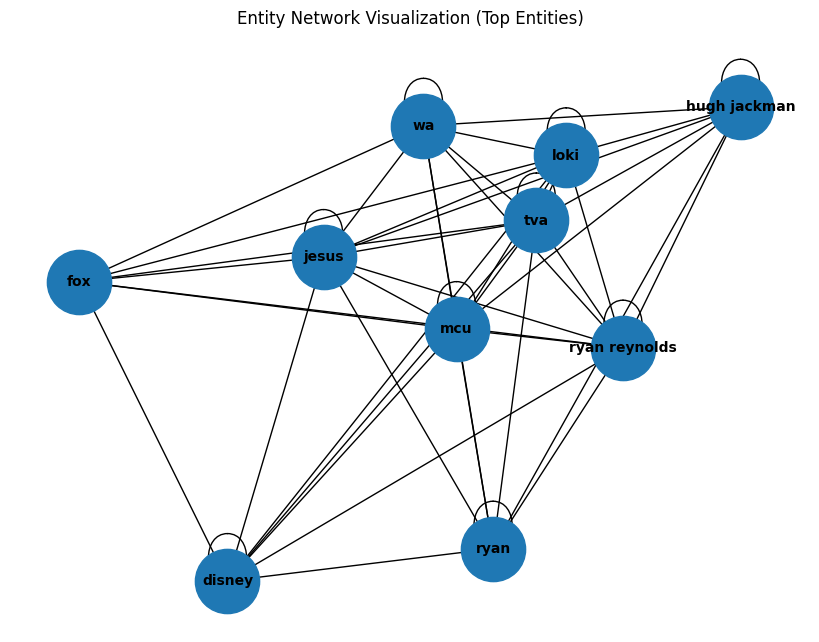

In [ ]:
import networkx as nx
# Get the most common entities and their counts
top_entities = df['entities'].explode().value_counts().head(10)

# Filter co-occurrence matrix to include only the top entities
filtered_co_occurrence_matrix = {key: value for key, value in co_occurrence_matrix.items() if key[0] in top_entities.index and key[1] in top_entities.index}

# Create a network graph
G = nx.Graph()

# Add nodes for top entities
G.add_nodes_from(top_entities.index)

# Add edges between co-occurring top entities
for (entity1, entity2), weight in filtered_co_occurrence_matrix.items():
    G.add_edge(entity1, entity2, weight=weight)

# Draw the network graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2139, font_size=10, font_weight='bold')
plt.title('Entity Network Visualization (Top Entities)')
plt.show()

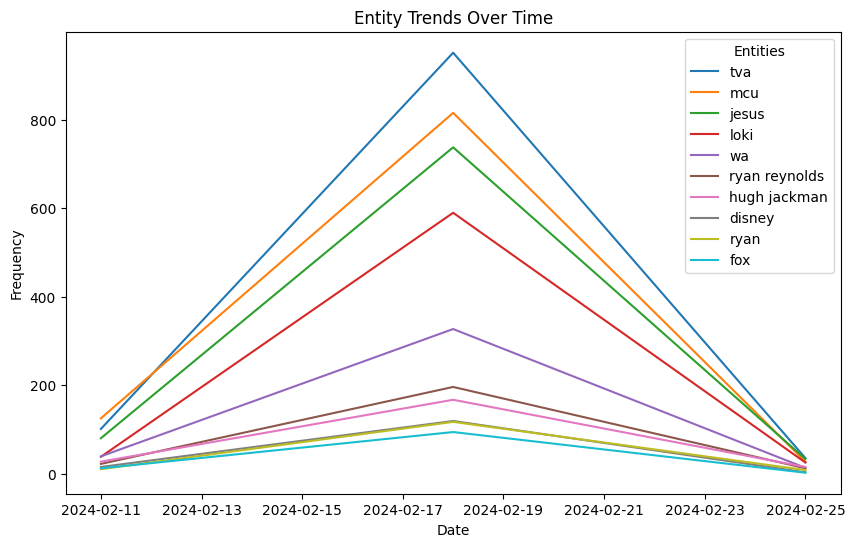

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode the lists in the 'entities' column into separate rows
exploded_df = df.explode('entities')

# Filter out rows where 'entities' column is not NaN
filtered_df = exploded_df.dropna(subset=['entities'])

# Group by 'Date' column and count occurrences of each entity for each date
entity_trends = filtered_df.groupby(['Date', 'entities']).size().unstack(fill_value=0)

# Limit the number of entities plotted to top 5
top_entities = entity_trends.sum().nlargest(10).index
entity_trends = entity_trends[top_entities]

# Aggregate data over weekly intervals
entity_trends = entity_trends.resample('W').sum()

# Plot the trend of each entity over time
plt.figure(figsize=(10, 6))
for entity in entity_trends.columns:
    plt.plot(entity_trends.index, entity_trends[entity], label=entity)

plt.title('Entity Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend(title='Entities')
plt.show()

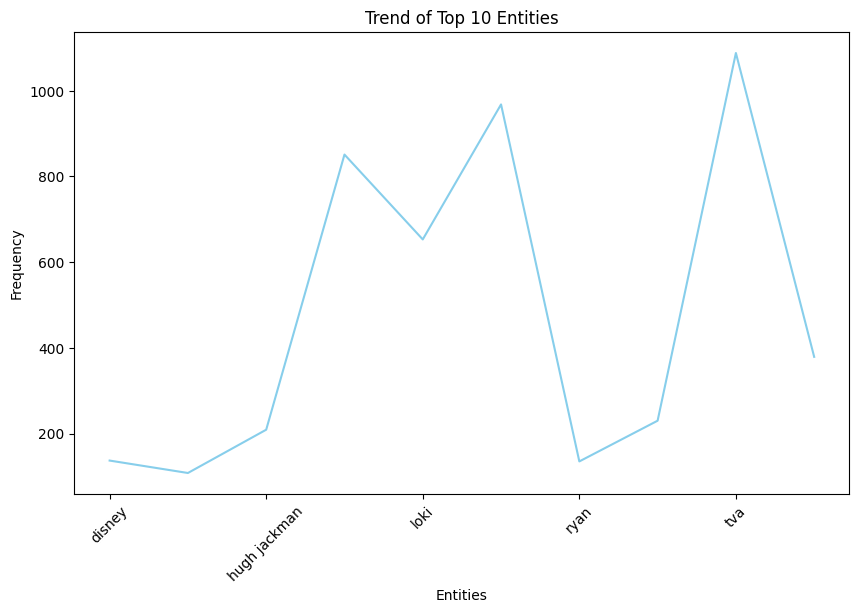

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Explode the lists in the 'entities' column into separate rows
filtered_df = df.explode('entities').dropna(subset=['entities'])

# Group by 'entities' column and count occurrences of each entity
entity_counts = filtered_df['entities'].value_counts()

# Get the top 10 entities based on their counts
top_entities = entity_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 entities
filtered_df = filtered_df[filtered_df['entities'].isin(top_entities)]

# Group by 'entities' column and count occurrences for each entity
entity_trends = filtered_df['entities'].value_counts().sort_index()

# Plot the trend of each entity
plt.figure(figsize=(10, 6))
entity_trends.plot(kind='line', color='skyblue')
plt.title('Trend of Top 10 Entities')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Assuming df contains the comments and associated data
# For demonstration purposes, let's assume we have a DataFrame with columns: 'comment', 'like_count', 'sentiment_score'

# Filter out relevant columns and drop NaN values
comments_df = df[['clean_text', 'like_count', 'sentiment_score']].dropna()

# Analyze comments sentiment
positive_comments = comments_df[comments_df['sentiment_score'] > 0]
negative_comments = comments_df[comments_df['sentiment_score'] < 0]

# Identify common concerns or preferences from negative comments
negative_common_concerns = negative_comments['clean_text'].value_counts().nlargest(5)

# Identify popular aspects or preferences from positive comments
positive_common_preferences = positive_comments['clean_text'].value_counts().nlargest(5)

# Print out the identified concerns and preferences
print("Top 5 Concerns from Negative Comments:")
print(negative_common_concerns)

print("\nTop 5 Preferences from Positive Comments:")
print(positive_common_preferences)

Top 5 Concerns from Negative Comments:
anyone else thought that the 2nd deadpool movie wa too depressing                                                                            1
please dont let this suck                                                                                                                    1
the fact that they made his time travel canon make the tva appearance make sense and yeah seems like deadpool killing hitler is canon now    1
such a tease it worked                                                                                                                       1
im not getting my hope too high for this it still disney                                                                                     1
Name: clean_text, dtype: int64

Top 5 Preferences from Positive Comments:
oohpegging the tva deadpool and wolverineoh my look like this movie will be interesting                                                                                     

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob

# Sentiment analysis
df['sentiment'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Topic modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
comment_matrix = vectorizer.fit_transform(df['clean_text'])
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(comment_matrix)

# Extract top words for each topic
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics[f"Topic {topic_idx + 1}"] = top_words

# Brand mentions or related keywords
brand_keywords = ['brand', 'loyalty', 'engagement']  # Add more keywords as needed
mentions = {}
for keyword in brand_keywords:
    mentions[keyword] = df['clean_text'].str.contains(keyword, case=False).sum()

# Print out results
print("Sentiment Analysis:")
print(df[['clean_text', 'sentiment']].head())

print("\nTop Topics Identified:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

print("\nBrand Mentions or Related Keywords:")
for keyword, count in mentions.items():
    print(f"{keyword}: {count}")


Sentiment Analysis:
                                          clean_text  sentiment
0                                i wasnt unconscious   0.000000
1                               137 20th century fox   0.000000
2  oohpegging the tva deadpool and wolverineoh my...   0.500000
3                        what doe marvel mean in mcu  -0.312500
4  pegging isnt new friendo but it is for disney ...   0.136364

Top Topics Identified:
Topic 1: deadpool, mcu, na, gon, wolverine, trailer, disney, love, fox, new
Topic 2: marvel, movie, deadpool, jesus, mcu, good, finally, im, look, wolverine
Topic 3: wa, deadpool, war, wolverine, comic, secret, wade, look, dead, like
Topic 4: tva, deadpool, loki, marvel, universe, man, just, doom, like, wa
Topic 5: let, waiting, july, rated, birthday, best, im, film, disney, come

Brand Mentions or Related Keywords:
brand: 12
loyalty: 0
engagement: 0


In [ ]:
df

,author,like_count,Date,clean_text,sentiment_score,graded_sentiment_label,comment_length,entities
0,@stactionsmedia3318,0,2024-02-24 22:52:00,i wasnt unconscious,0.0000,Neutral,19,[]
1,@ZennexYT,0,2024-02-24 22:36:00,137 20th century fox,0.0000,Neutral,20,[]
2,@RobsWorld,1,2024-02-24 21:54:00,oohpegging the tva deadpool and wolverineoh my...,0.6369,Very positive,87,[tva]
3,@srd4952,0,2024-02-24 21:40:00,what doe marvel mean in mcu,0.4215,Positive,27,[mcu]
4,@user-ol3xk5fc7h,0,2024-02-24 21:36:00,pegging isnt new friendo but it is for disney ...,0.0000,Neutral,69,[disney lmaooo]
...,...,...,...,...,...,...,...,...
26462,@Jep_Hogglebirg,0,2024-02-11 23:37:00,not 1st,0.0000,Neutral,7,[]
26464,@gabrielmolina5599,1,2024-02-11 23:37:00,yeah he here,0.2960,Positive,12,[]
26466,@Ge3291,10,2024-02-11 23:37:00,finally ive been waiting,0.0000,Neutral,24,[]
26467,@christianleon4234,0,2024-02-11 23:37:00,yer,0.0000,Neutral,3,[]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22026 entries, 0 to 26473
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   author                  22026 non-null  object        
 1   like_count              22026 non-null  int64         
 2   Date                    22026 non-null  datetime64[ns]
 3   clean_text              22026 non-null  object        
 4   sentiment_score         22026 non-null  float64       
 5   graded_sentiment_label  22026 non-null  object        
 6   comment_length          22026 non-null  int64         
 7   entities                22026 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
df.entities.value_counts()

[]                            13421
[mcu]                           639
[jesus]                         636
[tva]                           541
[loki]                          310
                              ...  
[the mcu loki]                    1
[dear disney]                     1
[lastai kada, janu parcha]        1
[aur ek trailer banao]            1
[deadpool lesssgoooo]             1
Name: entities, Length: 4046, dtype: int64

In [ ]:
# 3. Explore Sentiment Trends Over Time (assuming 'updated_at' is a datetime column)
dfdf= df.groupby('Date')[df['entities'].].mean()
plt.figure(figsize=(10, 6))
sentiment_trends.plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.show()

SyntaxError: invalid syntax (<ipython-input-74-36311a3a8617>, line 2)

In [ ]:
# Filter out the empty lists from the 'entities' column
non_empty_entities = df[df['entities'].apply(lambda x: len(x) > 0)]['entities']

# Count the occurrences of each entity
entity_counts = non_empty_entities.explode().value_counts()

# Display the entity counts
print(entity_counts)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df['clean_text'] contains the preprocessed comments
comments = df['clean_text']

# Convert comments to a list
comment_list = comments.tolist()

# Create a CountVectorizer to convert text to a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
comment_matrix = vectorizer.fit_transform(comment_list)

# Initialize and fit LDA model
num_topics = 5  # Adjust the number of topics as needed
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(comment_matrix)

In [ ]:
# Assuming you have already trained the LDA model and have the topics extracted

# Get the topic-word matrix
topic_word_matrix = lda.components_

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Define the number of top words to consider for each topic
n_top_words = 10

# Create a dictionary to store dominant themes and their associated words
dominant_themes = {}

# Iterate through each topic
for topic_idx, topic in enumerate(topic_word_matrix):
    # Get the top words for the current topic
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]

    # Add the top words to the dominant themes dictionary
    dominant_themes[f"Topic {topic_idx + 1}"] = top_words

# Print the dominant themesc
print("Dominant Themes:")
for theme, words in dominant_themes.items():
    print(f"{theme}: {', '.join(words)}")


In [ ]:
# Calculate the proportion of positive, negative, and neutral comments
sentiment_distribution = df['graded_sentiment_label'].value_counts(normalize=True)

# Display the sentiment distribution
print("Sentiment Distribution:")
print(sentiment_distribution)


In [ ]:
# Extract negative comments for feedback
negative_comments = df[df['graded_sentiment_label'] == 'Negative']['clean_text']

# Display negative comments for improvement
print("Negative Comments for Improvement:")
for comment in negative_comments:
    print(comment)


In [ ]:
# Total number of comments Engagement Metrics
total_comments = len(df)

# Average sentiment score
average_sentiment_score = df['sentiment_score'].mean()

# Total number of likes
total_likes = df['like_count'].sum()

# Engagement metrics
engagement_metrics = {
    'Total Comments': total_comments,
    'Average Sentiment Score': average_sentiment_score,
    'Total Likes': total_likes
}

# Display engagement metrics
for metric, value in engagement_metrics.items():
    print(f'{metric}: {value}')